# Bayes-Toy-Discrete: Disease–Test Toy Model

This notebook implements a **simple discrete Bayesian inference toy model**:

- We consider a binary disease variable $D\in\{0,1\}$ (no disease / disease).
- A binary diagnostic test $T\in\{0,1\}$ (negative / positive).
- We specify:
  - Prior $P(D)$
  - Likelihoods $P(T=1\mid D=1)$ (sensitivity) and $P(T=0\mid D=0)$ (specificity)
- We then compute the **posterior** $P(D\mid T)$ using Bayes' rule.

We will:

1. Define a small set of parameters (prior, sensitivity, specificity).
2. Compute joint, marginal, and posterior probabilities.
3. **Visualize** the prior and posterior beliefs with bar plots.
4. Explore how the posterior changes when we vary the test quality.

Figures are saved to the `figs/` directory so they can be included in the LaTeX book.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Ensure figs directory exists
os.makedirs("figs", exist_ok=True)

print("Environment ready. Figures will be saved into ./figs/")

Environment ready. Figures will be saved into ./figs/


## 1. Defining the Toy Model

We consider:

- Disease variable $D \in \{0,1\}$:
  - $D=1$: patient **has** the disease
  - $D=0$: patient **does not** have the disease
- Test variable $T \in \{0,1\}$:
  - $T=1$: test result is **positive**
  - $T=0$: test result is **negative**

Parameters:

- Prior prevalence: $P(D=1) = \pi$, $P(D=0) = 1-\pi$.
- **Sensitivity**: $\text{sens} = P(T=1\mid D=1)$.
- **Specificity**: $\text{spec} = P(T=0\mid D=0)$.

From these, we can derive the full joint distribution $P(D,T)$ and then the posterior $P(D\mid T)$ via Bayes' rule:
$$
P(D=d\mid T=t) = \frac{P(T=t\mid D=d)\,P(D=d)}{P(T=t)}.
$$

In [2]:
def disease_test_model(pi=0.01, sens=0.95, spec=0.98):
    """Return joint, marginal, and posteriors for the disease–test toy model.

    Parameters
    ----------
    pi : float
        Prior probability of disease, P(D=1).
    sens : float
        Sensitivity, P(T=1 | D=1).
    spec : float
        Specificity, P(T=0 | D=0).
    """
    # Prior on D
    p_D = np.array([1 - pi, pi])  # [P(D=0), P(D=1)]

    # Likelihood table P(T|D): rows D, cols T
    # T=0, T=1
    P_T_given_D = np.array([
        [spec, 1 - spec],   # D=0
        [1 - sens, sens],   # D=1
    ])

    # Joint P(D,T) = P(T|D) * P(D)
    P_joint = (P_T_given_D.T * p_D).T  # shape (2,2)

    # Marginal P(T)
    p_T = P_joint.sum(axis=0)  # [P(T=0), P(T=1)]

    # Posterior P(D|T) via Bayes: P(D,T) / P(T)
    # Shape (2,2), columns index T, rows index D
    P_D_given_T = P_joint / p_T

    return {
        "p_D": p_D,
        "P_T_given_D": P_T_given_D,
        "P_joint": P_joint,
        "p_T": p_T,
        "P_D_given_T": P_D_given_T,
    }

params = disease_test_model()
params

{'p_D': array([0.99, 0.01]),
 'P_T_given_D': array([[0.98, 0.02],
        [0.05, 0.95]]),
 'P_joint': array([[9.702e-01, 1.980e-02],
        [5.000e-04, 9.500e-03]]),
 'p_T': array([0.9707, 0.0293]),
 'P_D_given_T': array([[9.99484908e-01, 6.75767918e-01],
        [5.15092202e-04, 3.24232082e-01]])}

## 2. Visualizing Prior vs Posterior

We now pick default parameters:

- Prior prevalence: $\pi = 0.01$ (1% of the population has the disease),
- Sensitivity: $0.95$,
- Specificity: $0.98$.

We will visualize:

1. The prior distribution $P(D)$.
2. The posterior $P(D\mid T=1)$ (after a positive test).
3. The posterior $P(D\mid T=0)$ (after a negative test).

This shows how Bayes' rule **updates** our beliefs given evidence.

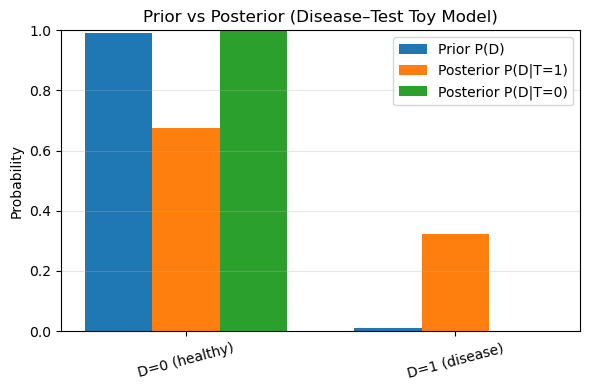

Saved figure to figs/bayes_toy_prior_posterior.png


In [3]:
def plot_prior_and_posteriors(pi=0.01, sens=0.95, spec=0.98, savepath=None):
    res = disease_test_model(pi=pi, sens=sens, spec=spec)
    p_D = res["p_D"]
    P_D_given_T = res["P_D_given_T"]  # shape (2,2), cols: T=0,1

    labels = ["D=0 (healthy)", "D=1 (disease)"]
    x = np.arange(2)
    width = 0.25

    fig, ax = plt.subplots(figsize=(6,4))

    # Prior
    ax.bar(x - width, p_D, width, label="Prior P(D)")

    # Posterior given T=1 (positive)
    ax.bar(x, P_D_given_T[:,1], width, label="Posterior P(D|T=1)")

    # Posterior given T=0 (negative)
    ax.bar(x + width, P_D_given_T[:,0], width, label="Posterior P(D|T=0)")

    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=15)
    ax.set_ylim(0.0, 1.0)
    ax.set_ylabel("Probability")
    ax.set_title("Prior vs Posterior (Disease–Test Toy Model)")
    ax.legend()
    ax.grid(alpha=0.3, axis="y")
    plt.tight_layout()

    if savepath is not None:
        fig.savefig(savepath, dpi=150)

    plt.show()

plot_prior_and_posteriors(savepath="figs/bayes_toy_prior_posterior.png")
print("Saved figure to figs/bayes_toy_prior_posterior.png")

### Interpretation

With a **rare disease** ($\pi=0.01$):

- The prior $P(D=1)$ is small.
- A positive test $T=1$ increases $P(D=1\mid T=1)$ but may still leave it
  moderate if the disease is very rare.
- A negative test $T=0$ usually pushes $P(D=1\mid T=0)$ even closer to zero.

This illustrates a central Bayesian idea: **likelihood** (test quality) and
**prior prevalence** jointly determine the posterior.


## 3. Varying Test Quality: Sensitivity and Specificity

We now explore how the posterior $P(D=1\mid T=1)$ (probability of disease after a positive test)
depends on the test's sensitivity and specificity.

We fix the prior prevalence $\pi$ and vary either:

- Sensitivity (with specificity fixed), or
- Specificity (with sensitivity fixed).

We then plot $P(D=1\mid T=1)$ as a function of these parameters.

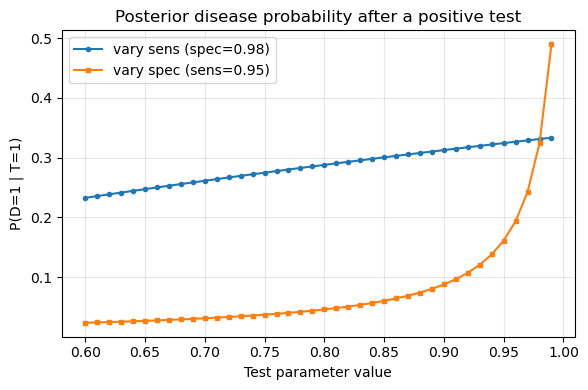

Saved figure to figs/bayes_toy_posterior_vs_quality.png


In [4]:
def posterior_positive(pi, sens, spec):
    res = disease_test_model(pi=pi, sens=sens, spec=spec)
    return res["P_D_given_T"][1,1]  # row D=1, col T=1

def plot_posterior_vs_test_quality(pi=0.01, savepath=None):
    sens_values = np.linspace(0.6, 0.99, 40)
    spec_values = np.linspace(0.6, 0.99, 40)

    # Vary sensitivity with fixed specificity
    spec_fixed = 0.98
    post_sens = [posterior_positive(pi, s, spec_fixed) for s in sens_values]

    # Vary specificity with fixed sensitivity
    sens_fixed = 0.95
    post_spec = [posterior_positive(pi, sens_fixed, c) for c in spec_values]

    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(sens_values, post_sens, marker="o", markersize=3, label="vary sens (spec=0.98)")
    ax.plot(spec_values, post_spec, marker="s", markersize=3, label="vary spec (sens=0.95)")

    ax.set_xlabel("Test parameter value")
    ax.set_ylabel("P(D=1 | T=1)")
    ax.set_title("Posterior disease probability after a positive test")
    ax.legend()
    ax.grid(alpha=0.3)
    plt.tight_layout()

    if savepath is not None:
        fig.savefig(savepath, dpi=150)

    plt.show()

plot_posterior_vs_test_quality(savepath="figs/bayes_toy_posterior_vs_quality.png")
print("Saved figure to figs/bayes_toy_posterior_vs_quality.png")

### Interpretation of the Sensitivity/Specificity Plot

- **Increasing sensitivity** improves $P(T=1\mid D=1)$, so a positive test becomes
  more informative when the disease is present.
- **Increasing specificity** improves $P(T=0\mid D=0)$, which reduces the false
  positive rate and can dramatically increase $P(D=1\mid T=1)$ when the disease is rare.

This illustrates why, in low-prevalence settings, **specificity** can be even more
critical than sensitivity for interpreting positive results.

## 4. Follow Up Exercise 

You can extend this notebook to match the book's exercise:

1. Change the prior prevalence $\pi$ and observe how the posterior changes.
2. Try alternative toy scenarios (e.g., spam email vs. classifier, sensor-fusion
   examples) by redefining the discrete states.
3. Add bar plots for $P(T)$ and $P(D,T)$ to visualize the joint and evidence.
4. Implement a tiny Naïve Bayes classifier on a discrete toy dataset where features
   are binary symptoms and the label is a disease class.